<a href="https://colab.research.google.com/github/Shrishml/ml_from_scratch/blob/main/k_mean_cluster_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#make_blobs?

In [4]:
k = 4
n=2

X, y = make_blobs(n_samples=1000, n_features=n, centers=k)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


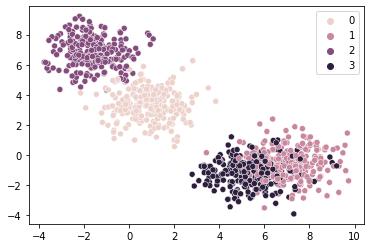

In [5]:
sns.scatterplot(X[:,0], X[:,1], hue= y)

- This is a generalized code works for any dimension of data.

- this is fast and efficeint just uses numpy array

- initialization has been optimized such that initial points come to far from each other

In [6]:
def initialize_kcenters(X,k, far= True):
  if ~far:
    cent= X[np.random.choice(range(len(X)),k)]
  if far:
    for i in range(10):
      cent= X[np.random.choice(range(len(X)),k)]
      
      d = np.std(X, axis=0)
      d1= np.std(cent, axis=0)
      if (d1>d).all():
        break
  return cent


def get_distance_matrix(X, cent_init, linag= True):
  if (linag != True):
    k = cent_init.shape[0]
    cent_init_n=np.tile(cent_init, (X.shape[0],1)).reshape((X.shape[0],k,X.shape[1]))
    X_n = np.tile(X,k).reshape(X.shape[0],k,X.shape[1])
    dis= np.sqrt(np.sum((X_n-cent_init_n)**2, axis=2)) # distance matrix
  if linag:

    X_s = np.sum(X**2, axis=1).reshape(X.shape[0],1)
    cent_s = np.sum(cent_init**2, axis=1).reshape(1,cent_init.shape[0])
    cross = X @ cent_init.T
    dis = np.sqrt(-2*cross+X_s + cent_s )

  return dis 


def fit_center(X,k, dis=get_distance_matrix, n=4 ):
  cent_init= initialize_kcenters(X,k)

  k= cent_init.shape[0]
  for j in range(n):
    distance_matrix= dis(X,cent_init)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)
    for i in range(k):
      X_i= X[np.where(closest_cluster_ids==i)]
      cent_init[i]= np.mean(X_i, axis=0)
  return closest_cluster_ids, cent_init

  
      

In [80]:
#sns.scatterplot?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt


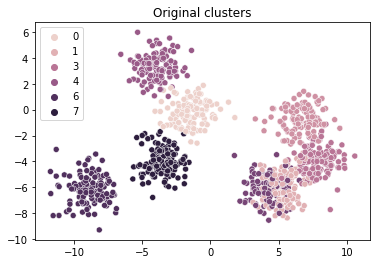

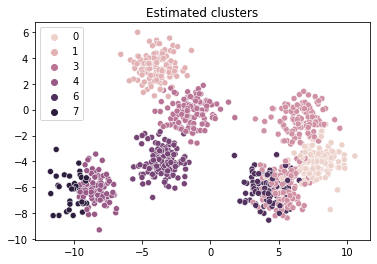

In [19]:
k = 8
n=4 # dimension

X, y = make_blobs(n_samples=1000, n_features=n, centers=k) # making data


y1,cent=fit_center(X,k=k, n=15)






plt.title("Original clusters")
sns.scatterplot(x=X[:,0],y= X[:,1], hue= y, ) #  this is plot is one projection
plt.show()

plt.title("Estimated clusters")
sns.scatterplot(x=X[:,0], y=X[:,1], hue= y1)

In [20]:
cent

array([[  7.73097219,  -4.05492269,  -8.6856674 ,  -7.85361566],
       [ -3.93909438,   3.32710592,  -2.39249079,   9.65395038],
       [  5.98619145,  -3.31284744,  -7.4896538 ,  -1.63726112],
       [ -1.4478898 ,  -0.21292755,  -0.12199554,  -2.42833177],
       [ -8.3762634 ,  -6.14958675,   7.72209069,  -3.79586628],
       [ -3.5405584 ,  -4.01472063,  -5.70209669,   5.46877643],
       [  4.23691172,  -6.06676052,  -6.8294885 ,   2.32121335],
       [-10.04916429,  -6.21085998,   8.26630962,  -3.53376045]])

In [21]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=k, random_state=0).fit(X)



kmeans.cluster_centers_

array([[ 4.25704604, -6.05442232, -6.83220442,  2.30554406],
       [-1.4478898 , -0.21292755, -0.12199554, -2.42833177],
       [-8.91159168, -6.16919419,  7.89624075, -3.71199241],
       [-3.93909438,  3.32710592, -2.39249079,  9.65395038],
       [ 7.89674003, -3.9484252 , -8.75211877, -8.01476655],
       [-3.5405584 , -4.01472063, -5.70209669,  5.46877643],
       [ 6.64558053, -0.79966502, -8.08286244,  0.07850416],
       [ 5.26656043, -5.97032707, -6.90910406, -3.6057207 ]])

# Rough work for testing code blocks of above function

In [91]:
cent

array([[-2.20424867,  6.65613145],
       [ 5.40036159, -1.32690389],
       [ 3.80616714,  6.52829968],
       [ 4.49083459, -7.95412246]])

In [54]:
cent_s

array([[246.92957324, 131.91732569,  76.41837034,  55.83194258]])

array([[17.12802577, 10.29211868,  2.77553747, 11.25155855],
       [10.89671908, 15.78840365,  9.2655146 ,  2.98603156],
       [14.95147116,  9.37250899,  2.50874811,  9.22949641],
       ...,
       [21.36845508,  2.75862315,  9.7968966 , 15.91720004],
       [10.91707074, 15.66719502,  9.45872372,  1.71467796],
       [21.3838511 ,  0.99397153, 10.10559087, 15.41337961]])

In [ ]:
import pandas as pd

In [ ]:
df= pd.DataFrame(np.c_[X,y,y1])
df.columns=['x0','x1','x2','x3','y','y1']
df

,x0,x1,x2,x3,y,y1
0,0.763389,-1.983648,1.929105,1.553762,1.0,2.0
1,6.305232,2.868655,-4.254261,6.650725,3.0,0.0
2,1.538327,-5.905860,-5.371159,9.300479,0.0,1.0
3,7.133904,1.452892,-4.783784,5.855029,3.0,0.0
4,8.245033,1.409181,-3.726867,7.282465,3.0,0.0
...,...,...,...,...,...,...
995,9.910598,2.329893,-1.175448,7.016214,3.0,0.0
996,-0.453456,-6.960661,-4.718007,9.793360,0.0,1.0
997,0.975824,-2.168559,1.988413,4.626183,1.0,2.0
998,2.506484,-1.169438,2.563471,3.095978,1.0,2.0


KeyError: ignored

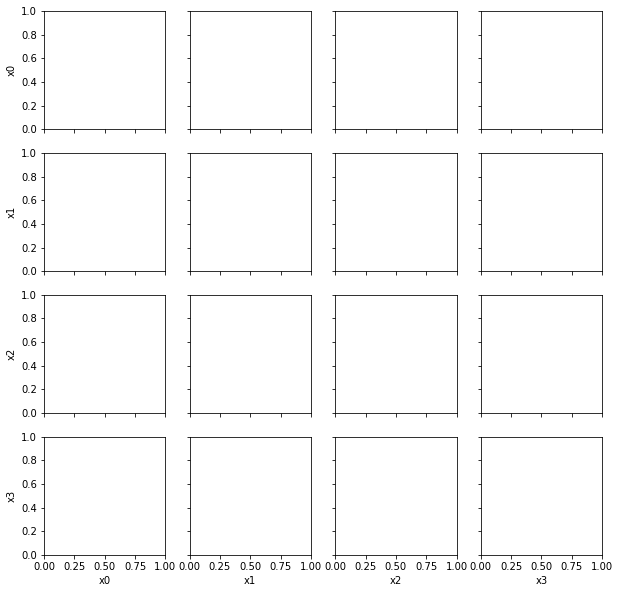

In [ ]:
sns.pairplot(df.loc[:,['x0','x1','x2','x3']], hue='y1')

In [ ]:
d

array([3.54960111, 2.26047606])

In [ ]:
cent=initialize_kcenters(X,k=4)
cent

array([[-1.22533162, -0.0091646 ],
       [-2.00712668, -1.87009278],
       [-3.29042818, -2.30192478],
       [-2.284389  , -2.22504715]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


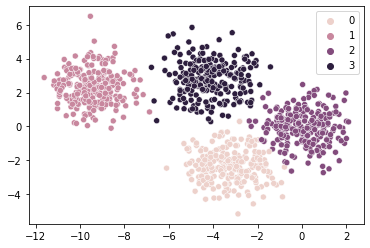

In [ ]:
#

In [ ]:
cent_init = initialize_kcenters(X,4)

In [ ]:
X2=np.sum(X**2,axis=1)

In [ ]:
np.sum(cent_init**2,axis=1)

array([16.6830959 , 15.14956584, 48.34635545, 63.0163183 ,  5.75587604])

In [ ]:
cross = X@cent_init.T

In [ ]:
cross.shape

(1000, 5)

In [ ]:
cent_init_n=np.tile(cent_init, (X.shape[0],1)).reshape((X.shape[0],k,X.shape[1]))

In [ ]:
X_n = np.tile(X,k).reshape(X.shape[0],k,X.shape[1])

In [ ]:
cent_init

array([[ 9.26506173,  1.61640513],
       [ 4.26860258, -3.74172341],
       [ 6.6891918 , -5.48030936],
       [ 8.93039851,  1.33260735]])

In [ ]:
X_n.shape, cent_init_n.shape

((1000, 4, 2), (1000, 4, 2))

In [ ]:
get_euclidean_distance(X, cent_init)

array([[ 7.98984769,  1.82899409,  4.79973191,  7.55367127],
       [ 1.27053761,  6.8498071 ,  6.63081119,  1.19383949],
       [ 6.06003064,  3.02992875,  1.49262695,  5.68649629],
       ...,
       [10.80050339,  3.67670697,  5.79466907, 10.36178624],
       [ 7.76456858,  1.14647791,  4.1112755 ,  7.32590356],
       [ 9.58179052,  2.88102738,  5.54765498,  9.145174  ]])

In [ ]:
distance_matrix=get_distance_matrix(X, cent_init)

In [ ]:
np.sqrt(np.sum((X_n-cent_init_n)**2, axis=2))

array([[ 7.98984769,  1.82899409,  4.79973191,  7.55367127],
       [ 1.27053761,  6.8498071 ,  6.63081119,  1.19383949],
       [ 6.06003064,  3.02992875,  1.49262695,  5.68649629],
       ...,
       [10.80050339,  3.67670697,  5.79466907, 10.36178624],
       [ 7.76456858,  1.14647791,  4.1112755 ,  7.32590356],
       [ 9.58179052,  2.88102738,  5.54765498,  9.145174  ]])

In [ ]:
X_n-cent_init_n

array([[[ -6.60744685,  -7.14433639],
        [ -4.03157693, -11.80613231],
        [ -6.60744685,  -7.14433639],
        [ -4.03157693, -11.80613231]],

       [[  0.44053396,  -3.84391706],
        [  3.01640389,  -8.50571299],
        [  0.44053396,  -3.84391706],
        [  3.01640389,  -8.50571299]],

       [[ -1.98875105,  -8.3766049 ],
        [  0.58711888, -13.03840082],
        [ -1.98875105,  -8.3766049 ],
        [  0.58711888, -13.03840082]],

       ...,

       [[ -0.71586439,  -1.47456217],
        [  6.38085011,  -6.54889292],
        [ -0.71586439,  -1.47456217],
        [  6.38085011,  -6.54889292]],

       [[  1.60985124,   0.47741596],
        [  8.70656574,  -4.59691479],
        [  1.60985124,   0.47741596],
        [  8.70656574,  -4.59691479]],

       [[ -0.22712028,  -0.09923787],
        [  6.86959422,  -5.17356862],
        [ -0.22712028,  -0.09923787],
        [  6.86959422,  -5.17356862]]])

In [ ]:
X_n

array([[[ 2.65761487, -2.8757338 ],
        [ 2.65761487, -2.8757338 ],
        [ 2.65761487, -2.8757338 ],
        [ 2.65761487, -2.8757338 ]],

       [[ 9.70559569,  0.42468552],
        [ 9.70559569,  0.42468552],
        [ 9.70559569,  0.42468552],
        [ 9.70559569,  0.42468552]],

       [[ 7.27631068, -4.10800232],
        [ 7.27631068, -4.10800232],
        [ 7.27631068, -4.10800232],
        [ 7.27631068, -4.10800232]],

       ...,

       [[ 0.90054074, -5.21628557],
        [ 0.90054074, -5.21628557],
        [ 0.90054074, -5.21628557],
        [ 0.90054074, -5.21628557]],

       [[ 3.22625638, -3.26430745],
        [ 3.22625638, -3.26430745],
        [ 3.22625638, -3.26430745],
        [ 3.22625638, -3.26430745]],

       [[ 1.38928485, -3.84096127],
        [ 1.38928485, -3.84096127],
        [ 1.38928485, -3.84096127],
        [ 1.38928485, -3.84096127]]])

In [ ]:
cent_init

array([[ 9.26506173,  1.61640513],
       [ 4.26860258, -3.74172341],
       [ 6.6891918 , -5.48030936],
       [ 8.93039851,  1.33260735]])

In [ ]:
cent_init_n

array([[[ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851],
        [ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851]],

       [[ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851],
        [ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851]],

       [[ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851],
        [ 9.26506173,  4.26860258],
        [ 6.6891918 ,  8.93039851]],

       ...,

       [[ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735],
        [ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735]],

       [[ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735],
        [ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735]],

       [[ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735],
        [ 1.61640513, -3.74172341],
        [-5.48030936,  1.33260735]]])

In [ ]:
closest_cluster_ids = np.argmin(distance_matrix, axis=1)



In [ ]:
def fit_center(X,k, dis=get_distance_matrix, n=4 ):
  cent_init= initialize_kcenters(X,k)

  k= cent_init.shape[0]
  for j in range(n):
    distance_matrix= dis(X,cent_init)

    closest_cluster_ids = np.argmin(distance_matrix, axis=1)
    for i in range(k):
      X_i= X[np.where(closest_cluster_ids==i)]
      cent_init[i]= np.mean(X_i, axis=0)
  return closest_cluster_ids, cent_init
      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


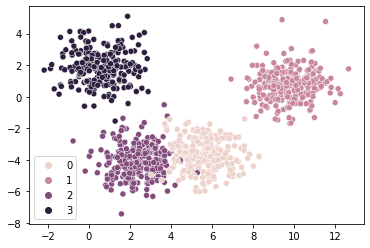

In [ ]:
sns.scatterplot(X[:,0], X[:,1], hue= y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


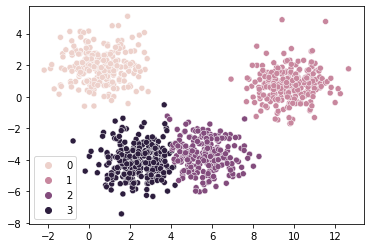

In [ ]:
y1,cent=fit_center(X,k=4, n=10)
sns.scatterplot(X[:,0], X[:,1], hue= y1)